# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

##### 2. Does the data look complete? Are there any obvious issues with the observations?

##### 3. Create a data dictionary for the dataset.

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [3]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import csv

with open('/users/nick/desktop/sat_scores.csv') as inputfile:
    sat_scores = list(csv.reader(inputfile))

##### 5. Print the data

In [5]:
print sat_scores

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [6]:
#the more I run this, the more pop will remove
labels = sat_scores.pop(0)
print labels
print sat_scores

['State', 'Rate', 'Verbal', 'Math']
[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12'

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [7]:
#unzip function. assumes each element (state, rate, math, verbal) had origin in four lists (all states, all rates, etc.)
#unzipping returns tuples, so enclosing in list() makes it a list
#list(zip(*sat_scores)[0])

list_of_states = [i[0] for i in sat_scores[:51]]
print list_of_states


['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [8]:
for a in sat_scores[0]:
    print type(a)

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [9]:
for state_data in sat_scores:
    state_data[1] = int(state_data[1])
    state_data[2] = int(state_data[2])
    state_data[3] = int(state_data[3])
print sat_scores

[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NE', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['WI', 6, 584, 596], ['AR', 6, 562, 55

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [49]:
#rate dict, with keys as states and values as rate
rate_dict = {elem[0]:elem[1] for elem in sat_scores[:51]}
print 'Participation Rate'
print rate_dict

#verbal dict, with keys as states and values as verbal score
verbal_dict = {elem[0]:elem[2] for elem in sat_scores[:51]}
print 'Verbal Score Average'
print verbal_dict

# math_dict, with keys as states and values as math score
math_dict = {elem[0]:elem[3] for elem in sat_scores[:51]}
print 'Math Score Average'
print math_dict

Participation Rate
{'WA': 53, 'DE': 67, 'DC': 56, 'WI': 6, 'WV': 18, 'HI': 52, 'FL': 54, 'WY': 11, 'NH': 72, 'NJ': 81, 'NM': 13, 'TX': 53, 'LA': 7, 'NC': 65, 'ND': 4, 'NE': 8, 'TN': 13, 'NY': 77, 'PA': 71, 'RI': 71, 'NV': 33, 'VA': 68, 'CO': 31, 'AK': 51, 'AL': 9, 'AR': 6, 'VT': 69, 'IL': 12, 'GA': 63, 'IN': 60, 'IA': 5, 'OK': 8, 'AZ': 34, 'CA': 51, 'ID': 17, 'CT': 82, 'ME': 69, 'MD': 65, 'MA': 79, 'OH': 26, 'UT': 5, 'MO': 8, 'MN': 9, 'MI': 11, 'KS': 9, 'MT': 23, 'MS': 4, 'SC': 57, 'KY': 12, 'OR': 55, 'SD': 4}
Verbal Score Average
{'WA': 527, 'DE': 501, 'DC': 482, 'WI': 584, 'WV': 527, 'HI': 485, 'FL': 498, 'WY': 547, 'NH': 520, 'NJ': 499, 'NM': 551, 'TX': 493, 'LA': 564, 'NC': 493, 'ND': 592, 'NE': 562, 'TN': 562, 'NY': 495, 'PA': 500, 'RI': 501, 'NV': 509, 'VA': 510, 'CO': 539, 'AK': 514, 'AL': 559, 'AR': 562, 'VT': 511, 'IL': 576, 'GA': 491, 'IN': 499, 'IA': 593, 'OK': 567, 'AZ': 523, 'CA': 498, 'ID': 543, 'CT': 509, 'ME': 506, 'MD': 508, 'MA': 511, 'OH': 534, 'UT': 575, 'MO': 577, 

##### 11. Create a dictionary with the values for each of the numeric columns

In [11]:
state_math_scores = [x[3] for x in sat_scores[:51]]

state_verbal_scores = [x[2] for x in sat_scores[:51]]

state_participation_rates = [x[1] for x in sat_scores[:51]]

labels_minus_state = labels[1:]

combined_scores = [state_participation_rates, state_verbal_scores, state_math_scores]

compiled_scores = dict(zip(labels_minus_state, combined_scores))
print compiled_scores

{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]}


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [12]:
print 'Highest Participation Rate'
print max(compiled_scores['Rate'])
print 'Lowest Participation Rate'
print min(compiled_scores['Rate'])

print 'Highest Average Verbal Score'
print max(compiled_scores['Verbal'])
print 'Lowest Average Verbal Score'
print min(compiled_scores['Verbal'])

print 'Highest Average Math Score'
print max(compiled_scores['Math'])
print 'Lowest Average Math Score'
print min(compiled_scores['Math'])

Highest Participation Rate
82
Lowest Participation Rate
4
Highest Average Verbal Score
593
Lowest Average Verbal Score
482
Highest Average Math Score
603
Lowest Average Math Score
439


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [13]:
def stddev(lst):
    length = len(lst)
    mean = sum(lst)/len(lst)
    return (sum([dev**2 for dev in [x - mean for x in lst]]) / length)**(0.5)

print stddev(compiled_scores['Rate'])
print stddev(compiled_scores['Verbal'])
print stddev(compiled_scores['Math'])

27.276363394
33.0302891298
35.9304884464


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [51]:
scores = pd.read_csv('/users/nick/desktop/sat_scores.csv')


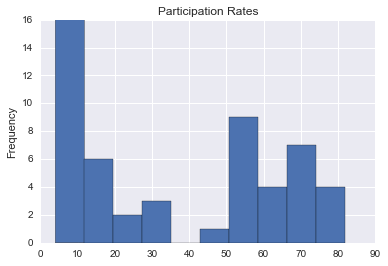

In [25]:
scores['Rate'].plot.hist(title = 'Participation Rates')

##### 15. Plot the Math distribution

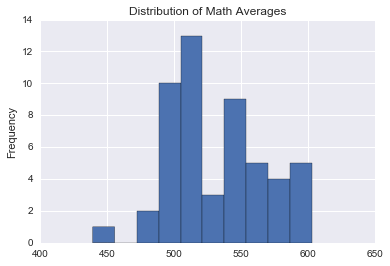

In [26]:
scores['Math'].plot.hist(title = 'Distribution of Math Averages')

##### 16. Plot the Verbal distribution

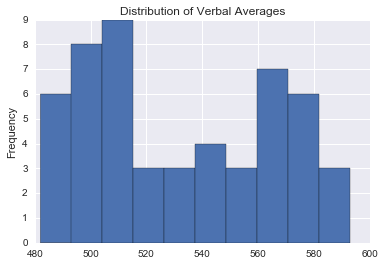

In [27]:
scores['Verbal'].plot.hist(title = 'Distribution of Verbal Averages')

##### 17. What is the typical assumption for data distribution?

That it is a normal distribution.

##### 18. Does that distribution hold true for our data?

The math distribution is normal. The verbal distribution--which is bimodal--approaches normalcy.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

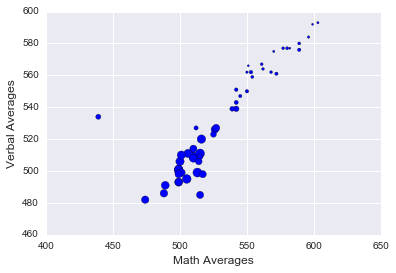

In [35]:
plt.scatter(scores.Math, scores.Verbal, s=scores.Rate)
ax = plt.gca()
ax.set_ylabel('Verbal Averages', fontsize = 12)
ax.set_xlabel('Math Averages', fontsize = 12)

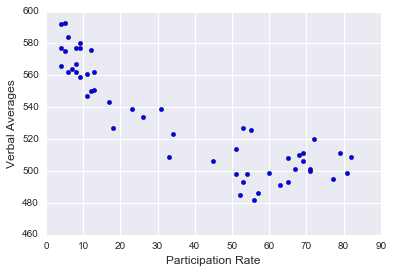

In [36]:
plt.scatter(scores.Rate, scores.Verbal)
ax = plt.gca()
ax.set_ylabel('Verbal Averages', fontsize = 12)
ax.set_xlabel('Participation Rate', fontsize = 12)

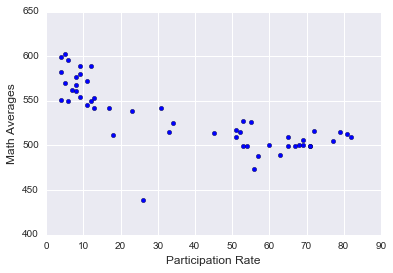

In [37]:
plt.scatter(scores.Rate, scores.Math)
ax = plt.gca()
ax.set_ylabel('Math Averages', fontsize = 12)
ax.set_xlabel('Participation Rate', fontsize = 12)

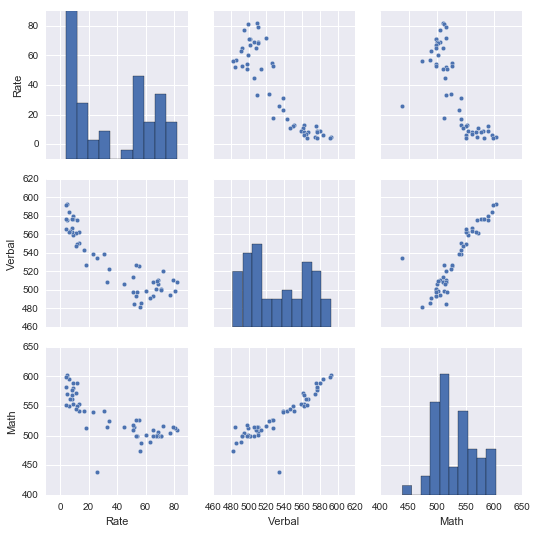

In [140]:
sns.pairplot(scores)

##### 20. Are there any interesting relationships to note?

Math and verbal are positively correlated, but sat scores are negatively correlated with state participation rate.

##### 21. Create box plots for each variable. 

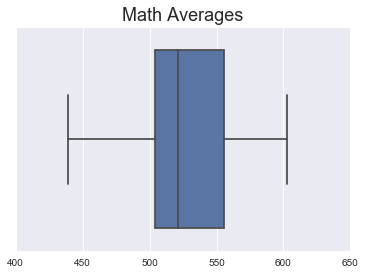

In [41]:
sns.boxplot([scores.Math])
ax = plt.gca()
ax.set_title('Math Averages', fontsize=18, y=1.01)

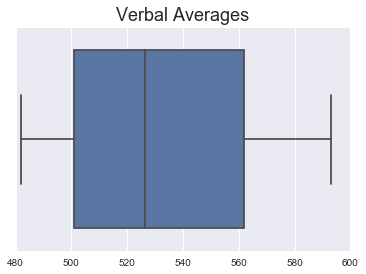

In [42]:
sns.boxplot([scores.Verbal])
ax = plt.gca()
ax.set_title('Verbal Averages', fontsize=18, y=1.01)

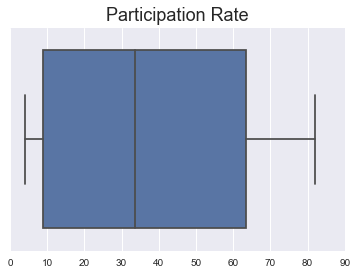

In [43]:
sns.boxplot([scores.Rate])
ax = plt.gca()
ax.set_title('Participation Rate', fontsize=18, y=1.01)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 